# Graph Theory Deep Dive - Graph Coloring Using Greedy Algorithms
### Evelyn Kessler, Elin O'Neill, Maya Cranor
#### October 22, 2023

Graph coloring is the process of coloring the vertices of a graph such that no two adjacent (i.e. connected by an edge) vertices are the same color. Of course, it would be easy to color a graph with n vertices n different colors. The goal of graph coloring is to color the vertices with the fewest number of colors possible; the minimum number of colors needed to color a graph is called its chromatic number [6?]. Graph coloring has a stunning variety of applications, including but not limited to scheduling and timetable problems (such as creating the Olin class schedule), solving Sudoku puzzles, coloring physical maps, register allocation, and assigning frequencies for mobile radios [6?].

For example, Sudoku is a game where you fill a table, typically 9 x 9 in area, with numbers from 1-9. Within the table, there are nine 3 x 3 "blocks" that evenly divide the board. The goal of the game is to fill the board's cells with numbers 1-9 without having any repeating numbers within a row, column, or block. Usually these puzzles are solved logically and through trial and error, but it is possible to solve them using graph theory! You can solve a Sudoku puzzle by treating the table as a graph. Each cell is a node and if two cells are in the same block, column, or row, then there is a edge between them. In a traditional Sudoku game, you are filling each cell with a number 1-9; these represent the colors in a graph coloring problem. Since the goal of Sudoku is to not have any number repeating within a column, row, or block, using graph coloring and not letting any adjacent nodes have the same color, acts in the same way and lets you solve the puzzle. [1] 

![A test image](sudoku.png)

Graph coloring is an NP-Complete problem, meaning that no efficient solution algorithm has yet been found. NP, or nondeterministic polynomial, problems are problems where the solution can be guessed and verified in polynomial time, but not solved in polynomial time like easy (or tractable) problems [9?]. This means that there is no one perfect algorithm for graph coloring; many algorithms exist with different efficiencies and trade-offs. Generally, these algorithms try to balance the number of colors used to color the graph with a relatively efficient run time and computational complexity. One class of algorithms is known as "greedy" algorithms. 

In this paper we will begin by taking a quick look at a brute force approach; we will understand mathematically (and see practically) why the brute force approach quickly becomes too computationally expensive for most uses. We will compare the inefficient (but perfectly accurate) brute force approach to the highly efficient (but lacking some accuracy) greedy approach, which is one of the least computationally expensive approaches and can run quickly even on high complexity graphs. The basic greedy approach moves through graphs in whatever order the vertices are given. This means that the basic greedy algorithm can vary dramatically depending on the order given, as shown below. 

![Greedy Coloring](Greedy_colourings.svg.png)

There are a variety of algorithms that increase the accuracy (a.k.a decrease the number of colors needed) of the basic greedy approach by applying an ordering to the vertices. We will investigate and contrast two such algorithms; the Welsh Powell algorithm which orders the vertices statically from highest to lowest degree and the DSatur algorithm which orders the vertices dynamically from highest to lowest saturation (i.e. the number of adjacent colored vertices).

### The Brute Force Approach

The brute force approaches the issue by determining every possible coloring and then checks all of those colorings against the graph to find the smallest valid one. In order to find the smallest possible coloring, we can start from the one-color coloring and go up to the n-color coloring. The more colors the graph needs the more we will end up checking, since the brute force algorithm has no way to know whether lower colorings will work. As such, the computation time grows exponentially as the size of the graph grows. Consider a graph with 10 vertices but only 1 edge. We know that we will find an answer in one of the two-color colorings (since most of the vertices can be the same color except one of the connected vertices needs to be a different color), so we likely will only need to check a small subset of all of the possible colorings. This shouldn't take too much time. Alternatively, consider a graph with 10 vertices and 36 edges (a K10 complete graph). Now all the vertices each have 9 adjacencies, which will take longer to check. Additionally, we know that we will find an answer only once we reach the 10-color coloring (since all vertices are connected to each other so they will all need to be different colors), so we will end up to checking all possible colorings, adding a significant amount of time to our graph. 

Additionally, for every possible coloring we try, we will also need to check whether it is a valid coloring. In the brute force implementation, this process involves investigating every vertex and checking the adjacencies of that vertex to determine if any are the same color. This is another way in which the size of the graph including both the number of vertices and the number of edges will exponentially increase the computation time. For a graph with 10 vertices and 1 edge, we will loop through the 10 vertices and run two additional loops once each for the two vertices that have 1 adjacency each. For a graph with 10 vertices and 36 edges, we will loop through 10 vertices and run 10 additional loops nine times each for the 9 adjacencies that each vertex has. This sized example is still relatively trivial to run on modern computers, but once we consider graphs with hundreds of vertices, having a few edges vs. thousands of edges will mean running thousands more loops and will start to have a noticeable effect on computational time. 

#### Functions
##### isValidColoring
Arguments: edge_list, vertex_colors \
Return: True/False

This function takes in a graph and a possible coloring for that graph, and returns whether that is a valid coloring (i.e. no adjacent vertices are the same color.)

1. For every vertex in the list:
    1a. Check if any of the adjacent vertices are the same color as that vertex. If so, return False.
2. If you get through every vertex and every adjacency and none of them have issues, then return True.

##### bruteForce
Arguments: edge_list \
Return: color_dict, run_time

This function finds a valid coloring with a minimum number of colors for any graph using a brute force approach. It begins by looking at coloring the graph with 1 color; if it can't find a valid coloring, it tries 2 colors, then 3 colors, etc. For each number of colors, it calculates all possible ways to color the graph with that many colors and then checks whether any of those ways are valid.

1. Start the timer and initialize the number of colors in the graph at 1.
2. Calculate all possible colorings for 1 coloring. 
3. For each possible coloring, check if it is a valid coloring of the graph. 
    3a. If it is; end the timer, create the color dictionary, calculate the run time, and return the color dictionary and run time.
4. If none of the colorings are valid, increase the number of colors in the graph by 1 and repeat from Step 2 with the new number of colorings. Continue until you find the first valid coloring.

##### allPossibleColorings
Arguments: edge_list, num_colors \
Return: list of colors

This graph finds all of the possible colorings with a certain number of colors for a graph. It accomplishes this using a "permutations with repetition" approach using the itertools library, where the colorings are represented as a list of numbers (0 is some color, 1 is another color, 2 is another color, etc) of the same legnth as the number of vertices in the graph, where the position in the list represents which vertex it is coloring. So, for example, a list [0, 1, 0] would mean vertex 0 is colored red, vertex 1 is colored blue, and vertex 2 is also colored red, where number 0 is color red and number 1 is color blue.



Brute Force Runtime: 0.6779994964599609


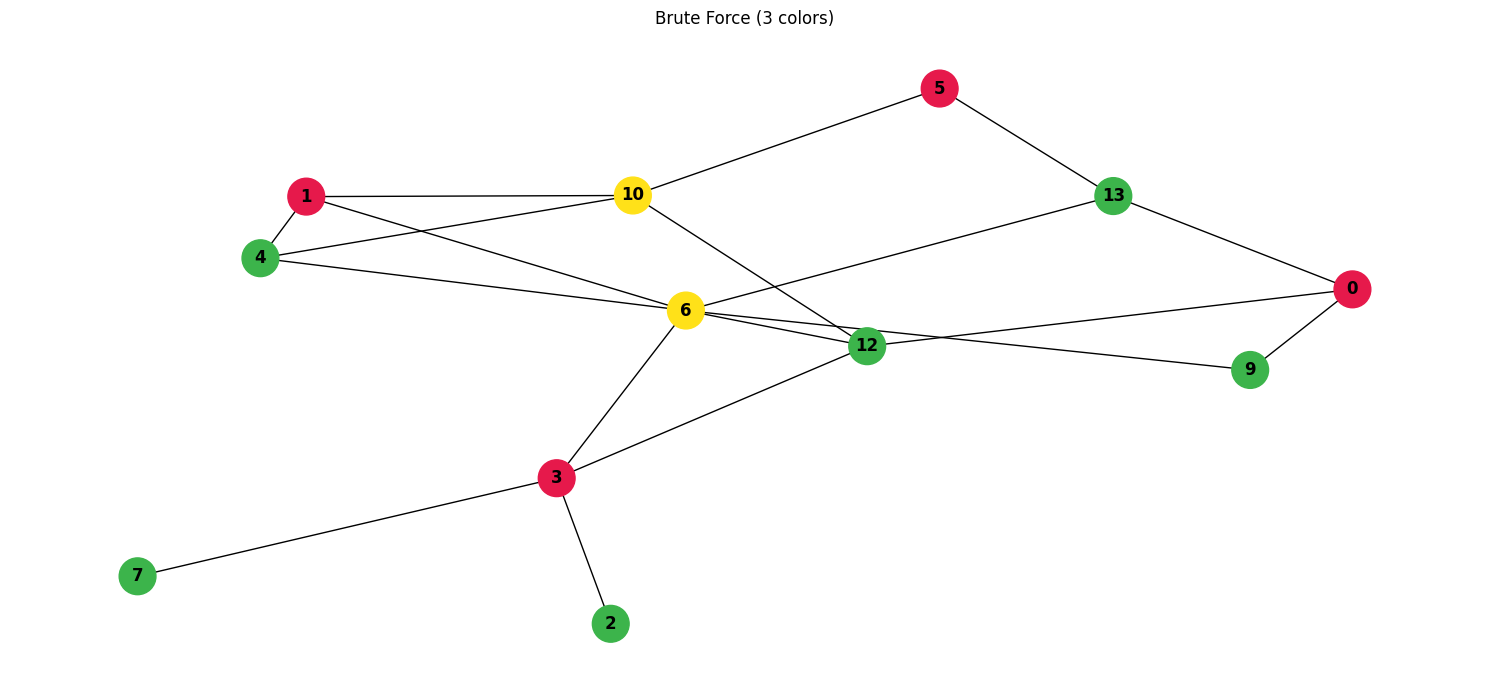

In [1]:
from code_1 import visualize_graphs
from code_1 import bruteForce
from code_1 import generate_random_graph

g1 = generate_random_graph(14, 18) #change these numbers to create graphs of different sizes: (number of vertices, number of edges)
# warning: if you try to run brute force on a larger graph, the runtime will exceed multiple minutes. for now, we recommend
# keeping the graph below 20 vertices and 30 edges.
g1_colors, g1_runtime = bruteForce(g1)
print(f"Brute Force Runtime: {g1_runtime}")
visualize_graphs(g1, "Brute Force", g1_colors)

### The Greedy Approach
The greedy approach is an extremely efficient coloring approach that goes through each vertex in the list (starting from the first) and finds the lowest possible color that is valid for that vertex. So, for example, Vertex 0 might get Color A, then Vertex 1 is connected to Vertex 0 so it can't get Color A so it gets Color B. Next, Vertex 2 is connected to Vertex 1 but not to Vertex 0, so it can get Color A. This continues until the algorithm reaches the last vertex. The greedy approach does not guarantee a coloring with minimum colors, but it can guarantee an upper bound of $d+1$ colors, where $d$ is the maximum degree of any vertex in the graph. Because of this, the greedy approach is often employed on large graphs where efficiency is necessary and it is acceptable to find something close to the minimum colors. For example, if you are trying to schedule meetings among 200 people, it would be acceptable to have a few more meetings than may have been absolutely necessary in favor of being able to recalculate quickly if someone's schedule changes or a new person is brought in to the group.

#### Functions
##### greedy
Arguments: edge_list

Return: color_dict, run_time

1. Start the timer
2. Create a list to hold the colors for each vertex; to start, fill the list with -1 to indicate this vertex is not colored. Item 0 in the list will be the color of vertex 0, item 1 the color of vertex 1, etc.
3. Create a list to hold whether a particular color is available for a particular edge. This list will be the same length as the number of vertices in the graph, and to start will have False for every value. 
4. Assign the first vertex to the lowest color. Also create a variable to track what the highest color being used is.
5. For each vertex in the graph:

    5a. To start, loop through all of the adjacencies for that vertex. For each of these adjacencies, note the color of the adjacent vertex and mark that color as not available in the list of available colors.

    5b. Starting at the lowest color (0), check whether each color can be used on this particular vertex using the list of available colors we created in 4a. Once you find the lowest possible color that is marked as available in the availability list (and therefore is not already taken by an adjacent vertex), set the color of this vertex to that color.

    5c. Add the color for this vertex to the colors list.

    5d. If this is a new color (i.e. no other vertices have been colored this color yet), then assign this color to the highest color tracking variable.

    5e. Lastly, reset the available colors list to be all False.
    
6. Stop the timer.
7. Convert the colors list into a dictionary with the vertex number as the key (in string format) and the vertex color as the value.
8. Calculate the runtime by taking the end time minus the start time.
9. Return the color dicitonary and the run time.


Greedy Runtime: 0.0


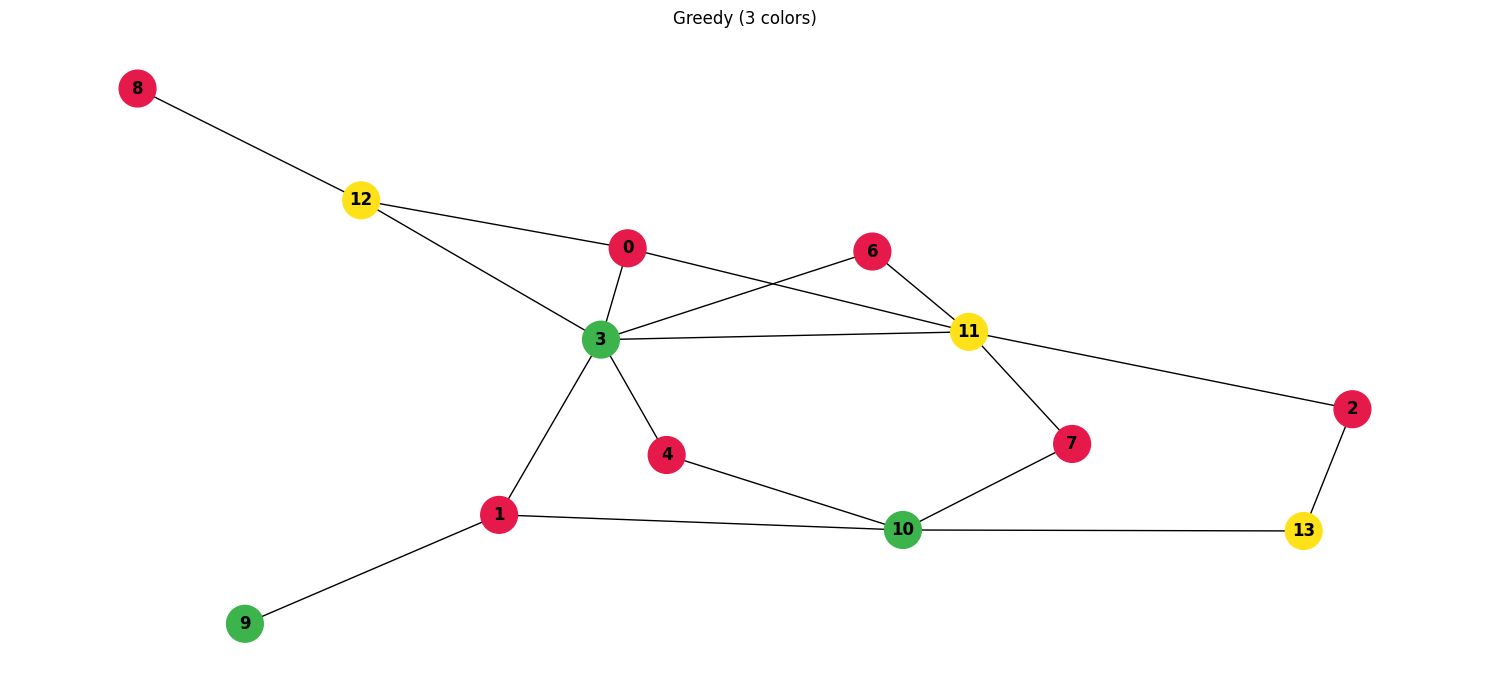

In [2]:
from code_1 import visualize_graphs
from code_1 import greedy
from code_1 import generate_random_graph

g2 = generate_random_graph(14, 18) #change these numbers to create graphs of different sizes: (number of vertices, number of edges)
#feel free to run the greedy algorithm on graphs as large as you want!
g2_colors, g2_runtime = greedy(g2)
print(f"Greedy Runtime: {g2_runtime}")
visualize_graphs(g2, "Greedy", g2_colors)

### Greedy vs. Brute Force
Add text here about theoretical/math of why greedy is faster and what the drawbacks are.

Graph created!
Beginning Brute Force Algorithm
Brute force runtime exceeds 60 seconds. Proceeding with only the greedy algorithm.
Beginning Greedy Algorithm
Finished Greedy Algorithm. Runtime: 0.0010006427764892578


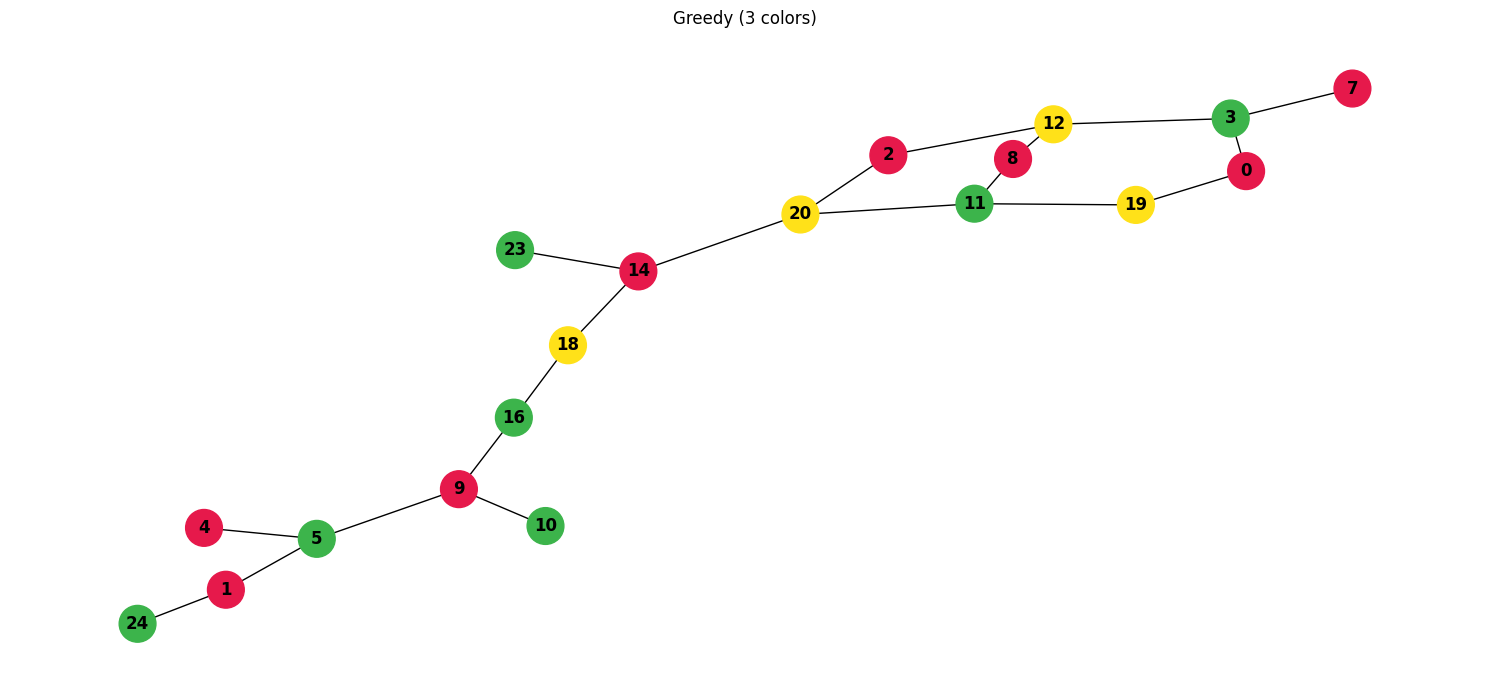

In [3]:
from code_1 import brute_vs_greedy_with_timeout
from code_1 import generate_random_graph

g3 = generate_random_graph(25, 20) #change these numbers to create graphs of different sizes: (number of vertices, number of edges)
# warning: if you try to run brute force on a larger graph, the runtime will exceed multiple minutes. for now, we recommend
# keeping the graph below 20 vertices and 30 edges.
print("Graph created!")
brute_vs_greedy_with_timeout(g3)

### Welsh Powell

The Welsh Powell Algorithm is a type of greedy algorithm that is used for determining the fewest number of colors that can be used to color the vertices of a graph so there will be no two adjacent vertices sharing a color. What differentiates this algorithm from a typical greedy algorithm, is that the Welsh Powell Algorithm sorts all of the vertices by descending degree before beginning to assign them colors. This approach helps to get the vertices with the highest degree taken care of early on, since the higher degree they are, the more likely they are to need a new color. 

Once the vertices are sorted by descending degree, the algorithm will go down the list of vertices. The first one that it gets to that doesn't already have a color assigned to it, will be assigned the color that vertices will be assigned that cycle. From there, any vertex that is not adjacent to any of the other vertices that were colored that round, will be colored the same color as the vertices in that cycle. This cycle of giving new colors to vertices that are already adjacent to previously assigned colors and are not adjacent to each other, continues until every vertex has been colored. 

After every vertex has been colored using the Welsh Powell algorithm, K, the smallest number of colors that could be used to color this graph so that no two adjacent vertices had the same color, will be found.

#### Functions
##### welsh_powell
Arguments: edge_list

Return: greedy(welsh_powell_sorted_list, False)   (This will return a color dictionary)

1. Take the generated edge list and sort it by degree. Degree is represented by the length of the list so we sort the list of lists by the length of each element.

2. Since this gives us the vertices in order from smallest degree to highest degree, we must reverse the list so that the vertices are listed in order of descending degree. 

3. Run the sorted list through the greedy algorithm and return the calculated values. Since the vertices were sorted, the ones with the most adjacencies will be taken care of and colored first. Reference the "greedy" section above for more information on this algorithm.

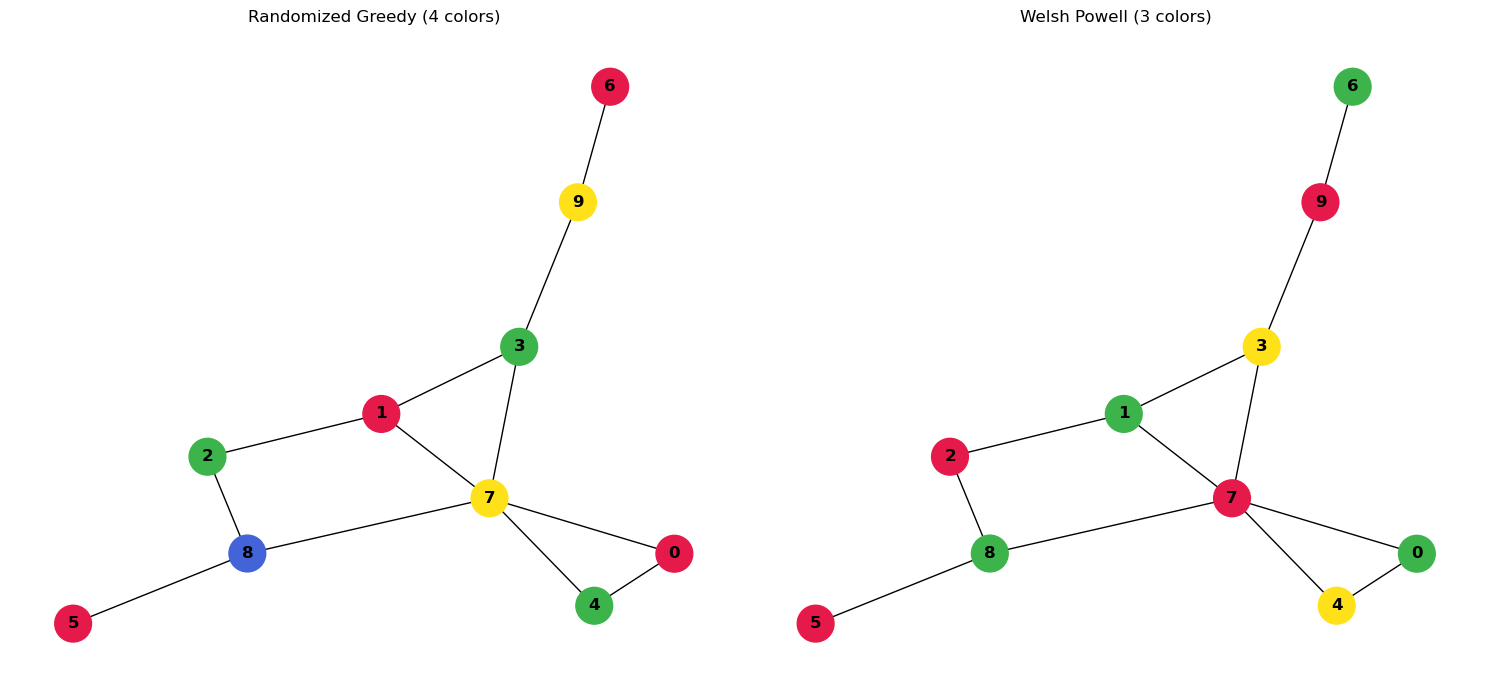

In [17]:
from code_1 import generate_random_graph
from code_1 import greedy
from code_1 import welsh_powell
from code_1 import visualize_graphs

g4 = generate_random_graph(10, 12) #change these numbers to create graphs of different sizes: (number of vertices, number of edges)
#feel free to run the greedy and welsh powell algorithms on graphs as large as you want!
g4_greedy, _ = greedy(g4)
g4_welsh_powell, _ = welsh_powell(g4)
visualize_graphs(g4, "Randomized Greedy", g4_greedy, "Welsh Powell", g4_welsh_powell)

### DSatur

The DSatur algorithm is another greedy algorithm that uses fairly similar principles to the Welsh-Powell Algorithm. It determines the fewest number of colors that can be used to color the vertices of a graph so there will be no two adjacent vertices sharing a color. Similar to the Welsh-Powell algorithm the DSatur algorithm optimizes its results by creating an intentional vertex ordering. However, orders the vertices based on which ever uncolored vertex has the highest saturation degree. The saturation degree is the number of uncolored neighbors that a node has. The main idea of this algorithm is that it focuses on the "more constrained" vertices (high saturation), since there are fewer color options for them. The "less constrained" vertices which get colored later since they will have less of an affect on the rest of the graph.

This list of vertices will be calculated as the algorithm goes on. Each step, it will check to see which vertex has the highest saturation and assign it a non-conflicting color. The list of uncolored vertices saturation values will be updated, and a new one will be selected. This will go on until all vertices are colored. Any ties will be resolved.

The algorithm can be solved in o(n^2) time, where n is the number of vertices in the graph. This done by identifying the next vertex to color by the DSatur rules and  by iterating through everything again to find what color it all allowed to be. See a more detailed break down after the code.

### DSatur algorithm steps:
Arguments: edge_list

Return: a list of colors correlated to the index of the vertices

1. Create a list of every vertices' saturation*
2. Create a list of every vertices' coloring (they should all be -1 to start)
3. For every vertex in the graph:

    2a. Select the vertex with the highest saturation

    2b. Check the other vertices that the selected vertex is next too and find their max color (color is encoded by a number)

    2c. Assign a color that has a value of one higher than the max found in the last step to this vertex
    
    2d. Update the saturation value (subtract 1) of every vertices that is connected to this vertex and is still uncolored

    2e. Remove this vertex from the saturation list 

*Saturation: the number of uncolored neighboring vertices

Handling of the saturation list can reduce time complexity. For example using a heap or a red black tree, has more efficient searching and removing node capabilities.

Greedy Runtime: 6.413459777832031e-05
DSatur Runtime: 0.0004336833953857422


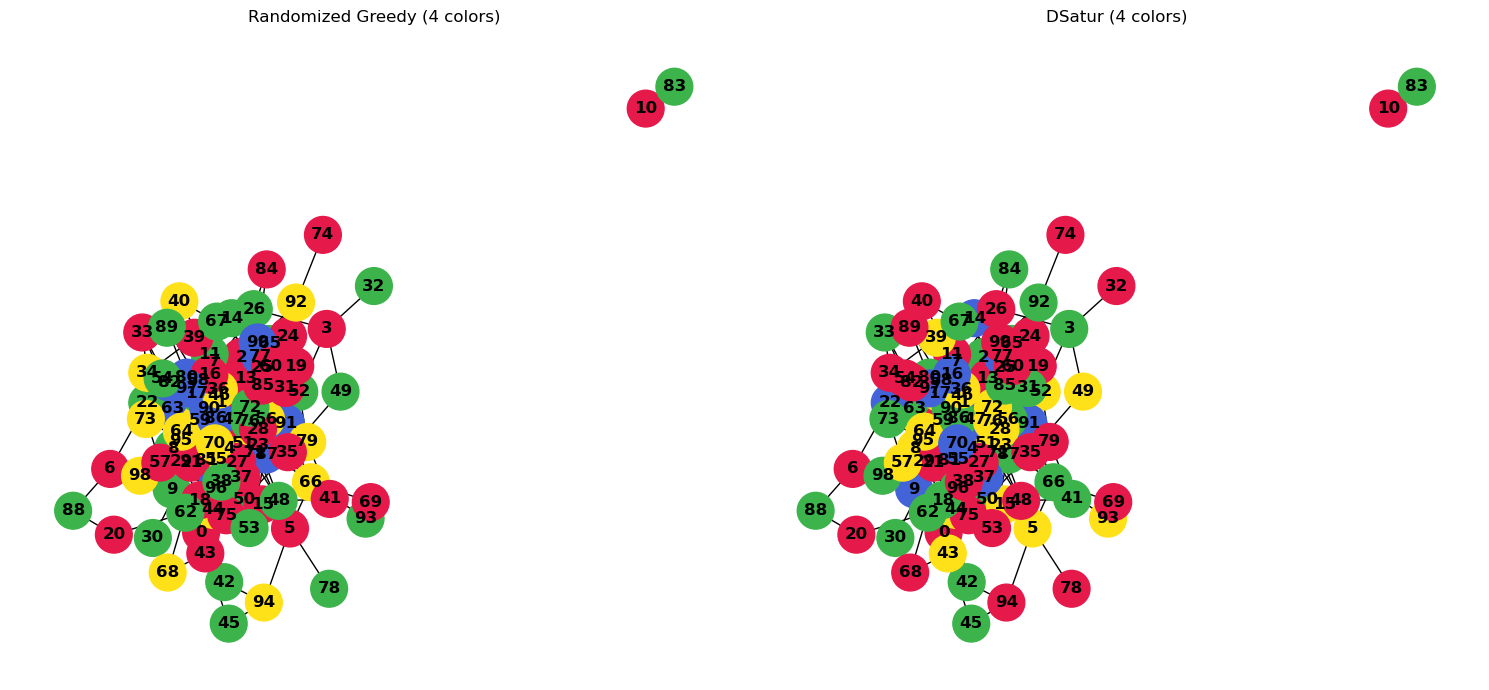

In [1]:
#run DSatur algorithm
from code_1 import generate_random_graph
from code_1 import greedy
from code_1 import DSatur
from code_1 import visualize_graphs
from code_1 import save_graph_data

g5 = generate_random_graph(100, 200) #change these numbers to create graphs of different sizes: (number of vertices, number of edges)
#feel free to run the greedy and welsh powell algorithms on graphs as large as you want!
g5_greedy, g5_runtime_greedy = greedy(g5)
g5_DSatur, g5_runtime_DS = DSatur(g5)
print(f"Greedy Runtime: {g5_runtime_greedy}")
print(f"DSatur Runtime: {g5_runtime_DS}")
visualize_graphs(g5, "Randomized Greedy", g5_greedy, "DSatur", g5_DSatur)
save_graph_data(g5, "Randomized Greedy", g5_greedy, "DSatur", g5_DSatur)

## Time Complexity Breakdown
(View the functions in the DSatur.ipynb to follow along)

1. Building Saturation List (build_sat_list function):
- Looping through each node to create the max heap: This involves iterating over all nodes once.
- Performing a heap operation (heapq.heappush) for each node, takes O(log N) time, where N is the number of nodes.
- The total time complexity of building the saturation list is O(N * log N).

2. Finding Color (find_color function):
- The find_color function iterates through the neighbors of a node to determine the available colors.
- In the worst case, it may iterate through all neighbors, which would be O(N) where N is the maximum number of neighbors.

3. Updating Saturation List (update_sat function):
- The update_sat function iterates through the saturation list, and for each node, it checks if it's a neighbor of the colored node and increments its saturation value.
- In the worst case, it would iterate through the entire saturation list and therefore would be O(N).

4. Main Loop (in DSatur function):
- The main loop iterates as long as there are nodes in the saturation list, and for each iteration, it performs the above operations.
- The saturation list will start with all of the nodes, making this O(N).

Putting it together, the overall time complexity of the DSatur function is O(N * log N + N^2), but it gets simplified down to O(N^2).

### Compare and Contrast

- Randomized Greedy uses a random initial coloring, while Welsh-Powell and DSatur have deterministic procedures.
- Welsh-Powell and DSatur aim to minimize conflicts by assigning colors to vertices without conflicts.
- Randomized Greedy is less reliable and can yield suboptimal results.
- Welsh-Powell sorts vertices by degree, which can lead to good results for graphs with varying degrees.
- DSatur focuses on maximizing the degree of saturation, providing better colorings for irregular graphs.
- DSatur may require more computational resources but often produces better colorings.

All three greedy algorithms are similar, and have different trade offs. The best one to use, depends on the specific characteristics of the graph you are trying to color. Randomized Greedy is the simplest and generally slightly faster but may not yield optimal results. Welsh-Powell works well for graphs with varying degrees, while DSatur is effective for irregular graphs where optimized colorings are desired.

In the testing of our code, we generally found that half of the time randomized greedy would use one more color than the Welsh Powell or the DSatur algorithm. However, the generalized greedy would be faster by one magnitude than both the Welsh Powell and DSatur algorithm. The Welsh Powell and DSatur algorithm would have have extremely similar run times, which makes sense as they both have a time complexity of o(n^2).

Greedy Runtime: 9.059906005859375e-06
Welsh Powell Runtime: 3.218650817871094e-05
DSatur Runtime: 3.218650817871094e-05


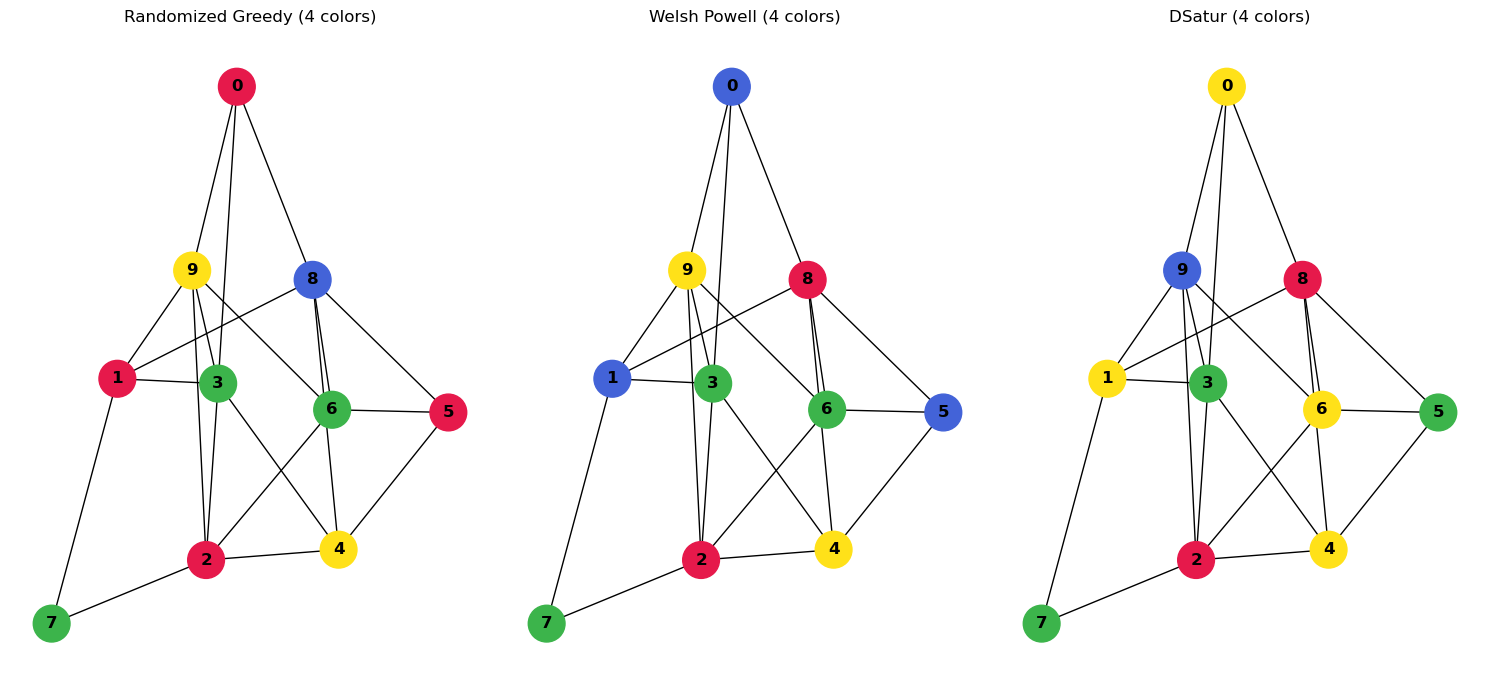

In [3]:
from code_1 import generate_random_graph
from code_1 import greedy
from code_1 import welsh_powell
from code_1 import DSatur
from code_1 import visualize_graphs

g6 = generate_random_graph(10, 20) #change these numbers to create graphs of different sizes: (number of vertices, number of edges)
#feel free to run these algorithms on graphs as large as you want!
g6_greedy, g6_runtime_greedy = greedy(g6)
g6_welsh_powell, g6_runtime_DS = welsh_powell(g6)
g6_DSatur, g6_runtime_DS = DSatur(g6)
print(f"Greedy Runtime: {g6_runtime_greedy}")
print(f"Welsh Powell Runtime: {g6_runtime_DS}")
print(f"DSatur Runtime: {g6_runtime_DS}")
visualize_graphs(g6, "Randomized Greedy", g6_greedy, "Welsh Powell", g6_welsh_powell, "DSatur", g6_DSatur)

### Appendix
#### See Past Graphs

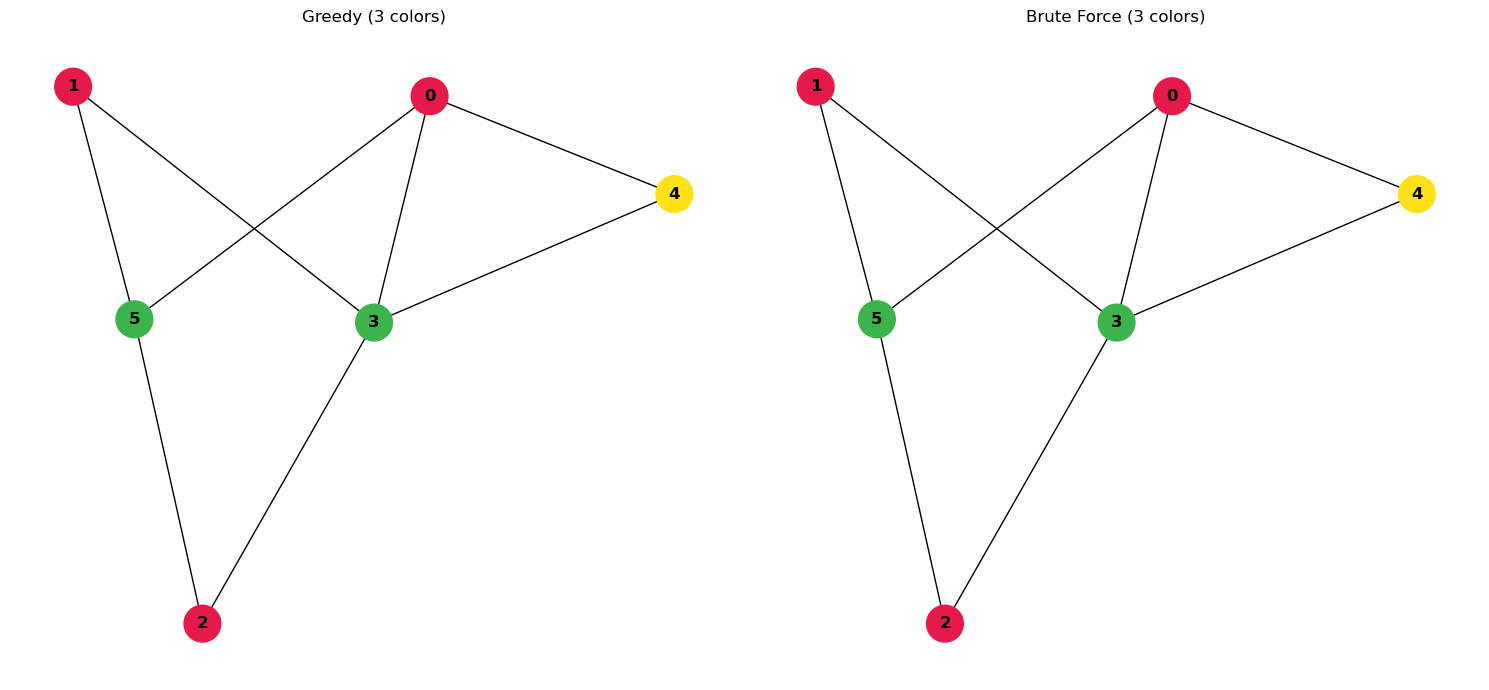

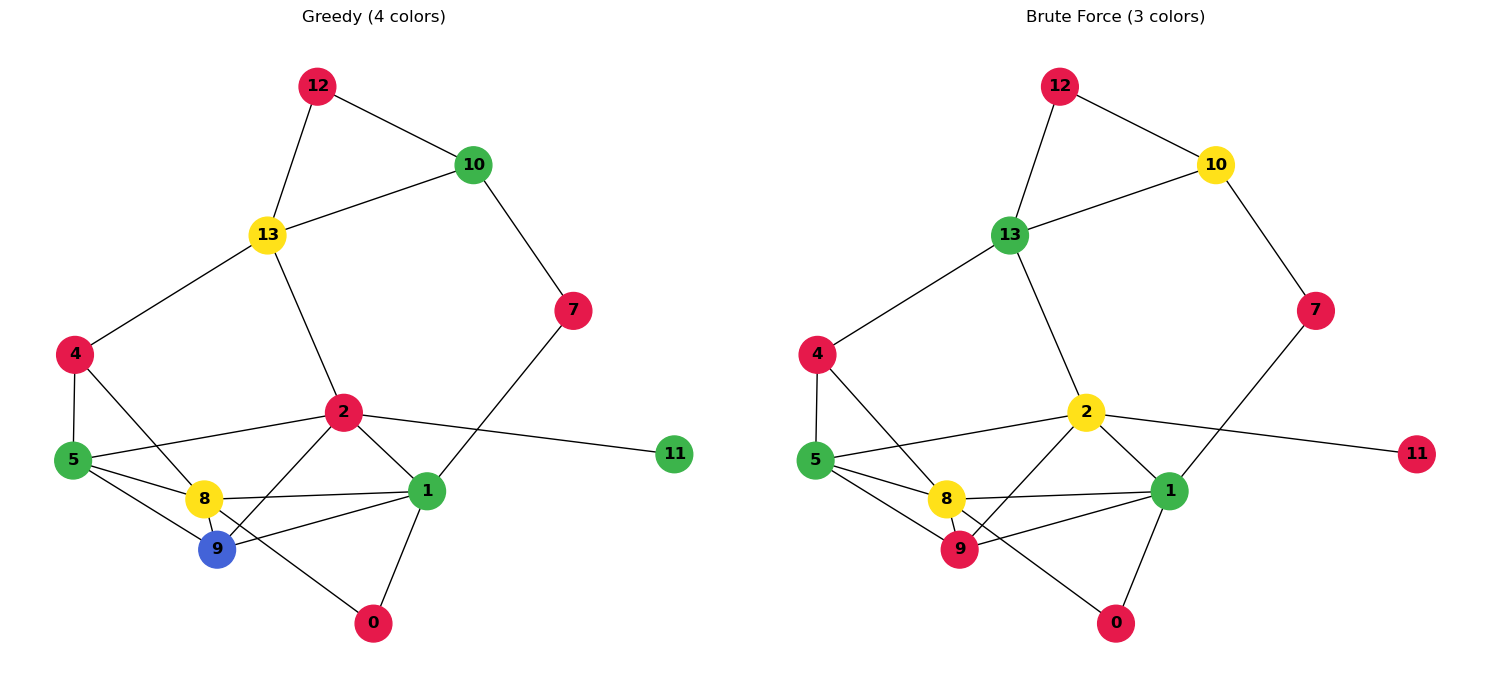

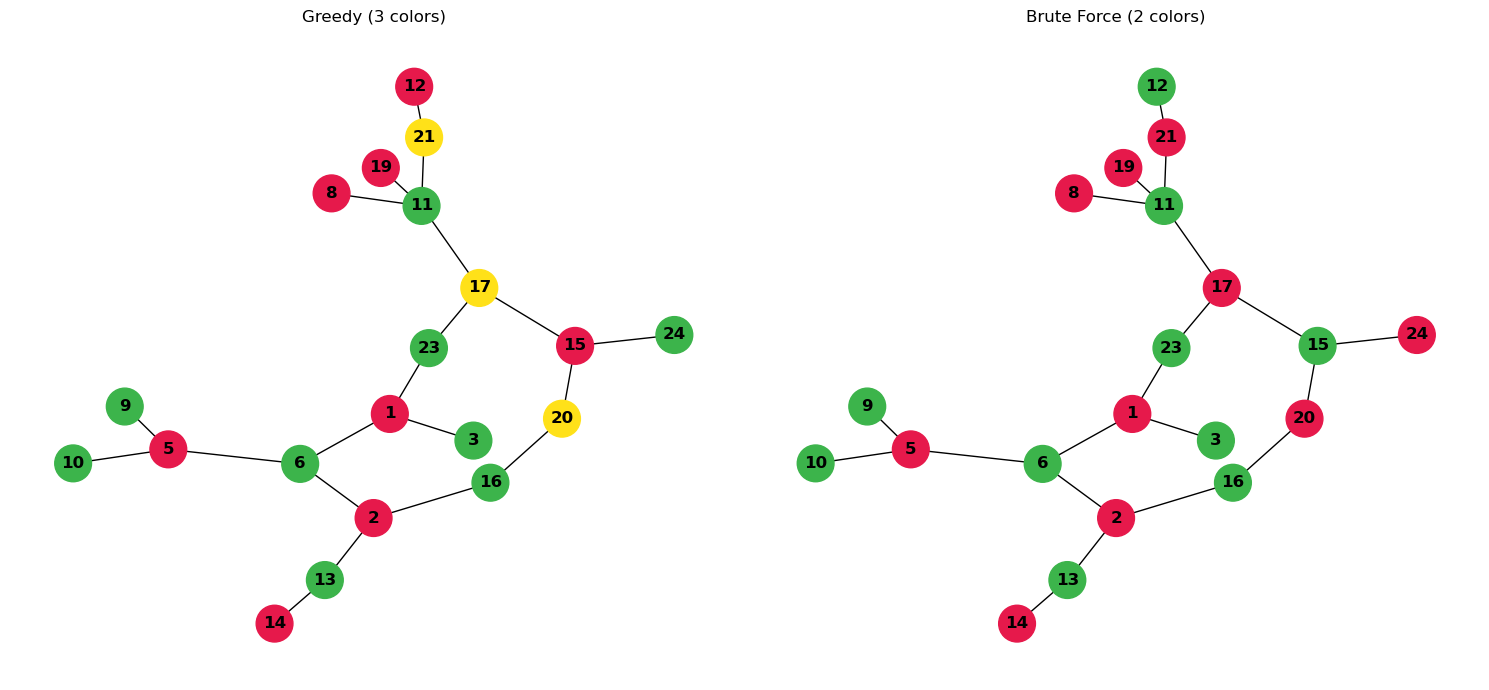

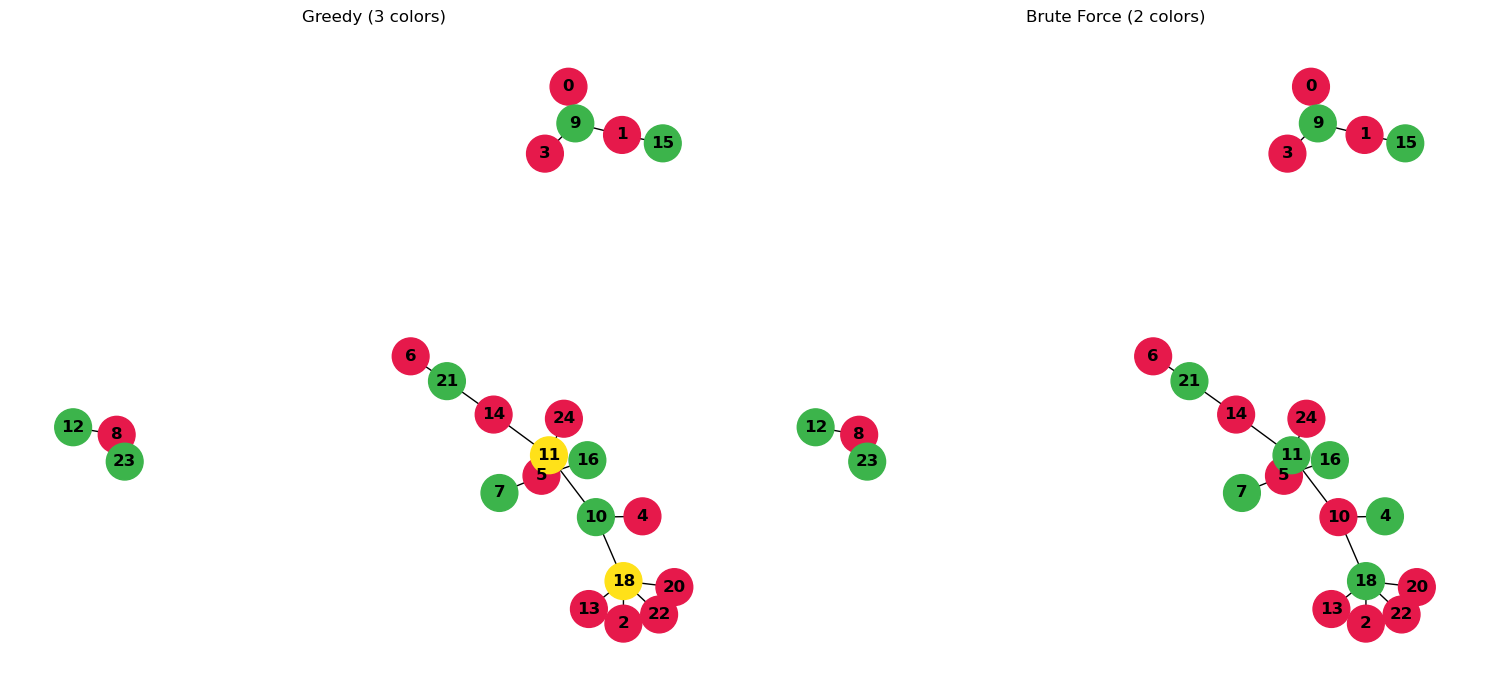

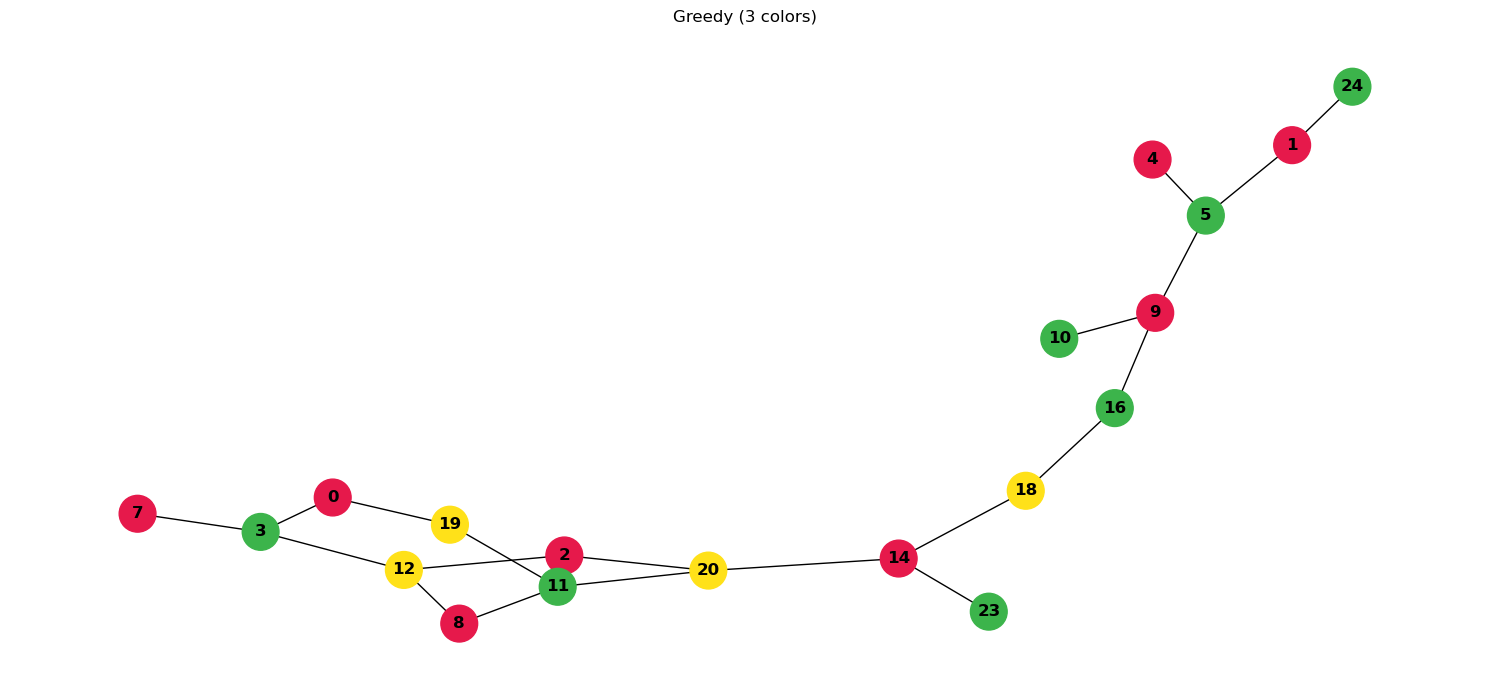

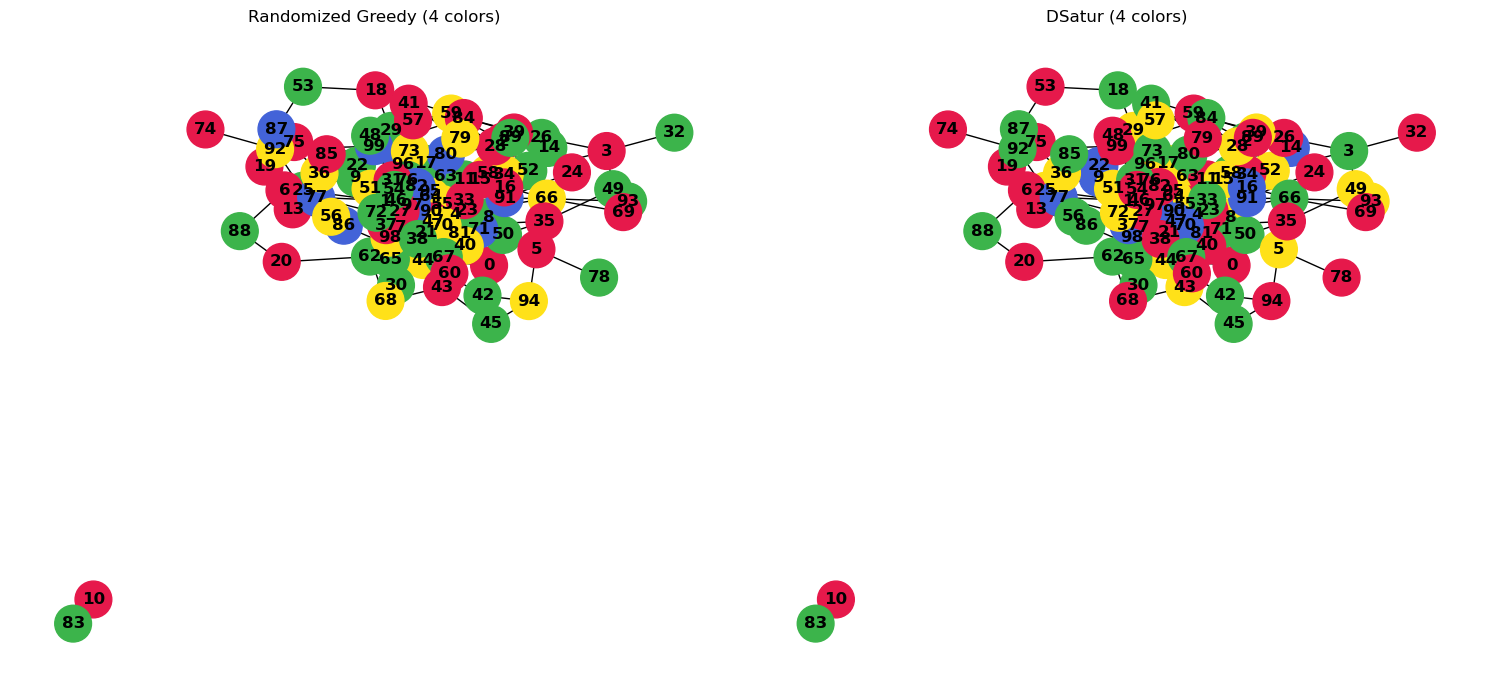

In [2]:
from code_1 import see_all_past_graphs

#uncomment to load all of the past saved graphs
see_all_past_graphs()

#### Additional Functions
These functions are used to create, save, and visualize the graphs in this paper.

##### addEdge
Arguments: edge_list, vertex_1, vertex_2 \
Return: edge_list

This function helps create a graph by connecting two edges together.

1. Append vertex_2 to the edge list entry for vertex_1
2. Append vertex_1 to the edge list entry for vertex_2

##### generate_random_graph
Arguments: num_vertices, num_edges \
Returns: edge_list

This function generates a random graph with num_vertices vertices and num_edges edges using the random library.

1. Check that the number of edges is possible given the number of vertices (i.e. can't make a graph with three vertices and 10 edges)
2. Create a blank edge list of length num_vertices. Create a variable to track how many edges you've added to the list so far.
3. Until you've added enough edges; pick a two random vertices, check that you didn't pick the same vertex and that there isn't already an edge between them, and then add an edge between them.

##### save_graph_data
Arguments: edge_list, coloring_1_name, colors_1, coloring_2_name, colors_2, coloring_3_name, colors_3 \
Return: None

This function saves a graph, along with up to three colorings, into a JSON file.

##### brute_vs_greedy_with_timeout
Arguments: edge_list \
Return: None

This function takes in a graph and runs the greedy and brute force colorings, visualizes the graph, and saves the graph. Additionally, it uses the multiprocessing library to observe how long the brute force algorithm takes; if it takes more than a minute, it terminates the brute force calculations and just completes and displays the greedy coloring for that graph. (Note that the run_brute_force function is just a small function used to make the multiprocessing work. You can imagine it as being nested inside.)

##### see_all_past_graphs
Arguments: None \
Return: None

This function opens the JSON file with the saved graphs and runs the visualization for each graph.

##### visualize_graphs
Arguments: edge_list, coloring_1_name, colors_1, coloring_2_name, colors_2, coloring_3_name, colors_3 \
Return: None

This function takes in a graph and up to three colorings and uses the networkx and matplotlib libraries to display a colored graph. In order to make the graphs as easy to compare as possible, the function has a defined color palette of 50 colors where each colors are as distinct from each other as possible. If the graph is very large, it will raise an error that the palette isn't big enough for that graph, but the palette can be easily manually extended if needed.

1. Initialize the graph.
2. Convert the edge list to a list of tuples instead of a list of lists so that the format is ready to be added to the graph. Then, add all of the edges to the graph.
3. Check how many colorings were given. Adjust maximum number of colors used appropriately. Create the list of colors for each coloration given.
5. Make sure that the palette has enough colors for this graph.
7. Fix the position of the plots. (Remember that you can display the same graph in different ways! This ensures that the two graphs are displayed identically to make them easier to compare.)
8. Draw the graph up to three times, once with each coloring. Add titles to the graph that include the number of colors in the graph.

### Sources

[1] Duran, Alejandra Ortiz. “Solving Sudoku Puzzles with Graph Theory.” Wolfram Community, Aug. 2023, community.wolfram.com/groups/-/m/t/2983903#:~:text=To%20solve%20the%20Sudoku%20using,row%2C%20column%2C%20and%20block. 

[2] “Graph Algorithms.”Graph Algorithms, www.cs.cornell.edu/courses/cs3110/2012sp/recitations/rec21-graphs/rec21.html. Accessed 15 Oct. 2023. 

[3] Graph Coloring Applications in Scheduling Courses Using ... - IEEE Xplore, 17 Nov. 2022, ieeexplore.ieee.org/abstract/document/9944511.

[4] “Graph Coloring Using Greedy Algorithm.” GeeksforGeeks, GeeksforGeeks, 10 Oct. 2023, www.geeksforgeeks.org/graph-coloring-set-2-greedy-algorithm/?ref=ml_lbp\%27.

[5] “Introduction to Graph Coloring.” GeeksforGeeks, GeeksforGeeks, 10 Oct. 2023, www.geeksforgeeks.org/graph-coloring-applications/.

[6] Kannimuthu, S., et al. “A Novel Approach for Agricultural Decision Making Using Graph Coloring - SN Applied Sciences.” SpringerLink, Springer International Publishing, 6 Dec. 2019, link.springer.com/article/10.1007/s42452-019-1847-8.

[7] “NP-Complete Problem.” Encyclopædia Britannica, Encyclopædia Britannica, inc., 6 Oct. 2023, www.britannica.com/science/NP-complete-problem.

[8] “Vertex Coloring: The Welsh Powell Algorithm.” Kleemans.Ch, www.kleemans.ch/static/fourcolors/welsh-powell.pdf. Accessed 16 Oct. 2023.

[9] Watson, Gordon. “Comparing the Efficiency of Welsh-Powell Algorithm and Basic Greedy Algorithm for Graph Coloring - Graph Theory.” CopyProgramming, 15 May 2023, copyprogramming.com/howto/why-is-welsh-powell-algorithm-better-than-the-basic-greedy-algorithm-for-graph-coloring

[10] “Welsh Powell Graph Colouring Algorithm.” GeeksforGeeks, GeeksforGeeks, 29 Oct. 2019, www.geeksforgeeks.org/welsh-powell-graph-colouring-algorithm/.

[11] “DSatur Algorithm for Graph Coloring.” GeeksforGeeks, https://www.geeksforgeeks.org/dsatur-algorithm-for-graph-coloring/

https://en.wikipedia.org/wiki/Greedy_coloring